# Sentiment Analysis
# Some Statistics

this note book contain functions that will returns:
(1) the sentiment analysis score of the data (supervised)
(2) the sentiment analysis score of the data (un-suprevised)
(3) some statistics about the data (TBD  Pos, len of sentences etc..)



######################### THE FUNCTION THAT CAN BE COPIED ####################

############# 1 ############

## First function using VADER

In [1]:
# required imports
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # download necessary data for sentiment analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [2]:
# Instantiate sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Define function to apply sentiment analysis to text
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [4]:
# Apply sentiment analysis to DataFrame and create new column with results
df['sentiment_pred'] = df['txt'].apply(get_sentiment)  # add a colum to the df

NameError: name 'df' is not defined

In [ ]:
# Apply sentiment analysis to a single document
def get_sentiment(text):
  return get_sentiment(text) # 0.5675 for example

AttributeError: ignored

############# 2 #################

## function using hugging face
https://huggingface.co/blog/sentiment-analysis-python

In [ ]:
# required imports
pip install -q transformers
from transformers import pipeline

In [ ]:
## sentiment analysis on a single document:
def hugging_sentiment(text):
  sentiment_pipeline = pipeline("sentiment-analysis")
  # if we want to insert a corpus and not a single text:
  #  chance "text" with "data" where: data = df['txt'].tolist()
  return sentiment_pipeline(text)  # [{'label': 'POSITIVE', 'score': 0.999708354473114}]

In [ ]:
## sentiment analysis on a single document - return only sentiment score:
def hugging_sentiment(text):
  sentiment_pipeline = pipeline("sentiment-analysis")
  # if we want to insert a corpus and not a single text:
  #  chance "text" with "data" where: data = df['txt'].tolist()
  score = sentiment_pipeline(text)[0]['score']
  if sentiment_pipeline(text)[0]['label'] =='NEGATIVE'
  score = score*(-1)
  return score  #  0.999708354473114

########  3 SUPERVISED  ###########

## Supervised Function

In [ ]:
# define the inputs to the function
texts = df.txt
labels = df.labels

In [ ]:
# required imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
def sentiment_test(df): # df should include 'txt' and 'labels' columns [df.txt , sd.labels]
  # split to train test
  train, test = train_test_split(df, test_size=0.2)  # split row's wise
  # define a model
  nb = MultinomialNB()
  # train a model
  nb.fit(train.txt, train.labels)
  # predict
  y_pred = nb.predict(test.txt)
  # return score
  print('Accuracy:', accuracy_score(test.labels, y_pred))
  return accuracy_score(test.labels, y_pred)

########## END OF FUNCTIONS REST IS DRAFT MODE   #####################

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
# Imports
import sklearn
import random
import re
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from itertools import islice
from sklearn.feature_extraction.text import CountVectorizer

### Loading the data

In [8]:
# load our dataset - 1000 documents from Amazon reviews (Kaggle)
df = pd.read_csv('df_filtered.csv')

In [9]:
# work on a copy
# embed using glove
df_copy = df.copy()

In [10]:
# divid to train and test;

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_copy, test_size=0.2)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 540 to 547
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    805 non-null    int64 
 1   txt           805 non-null    object
 2   sentiment     805 non-null    int64 
 3   num_of_words  805 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 58 to 657
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    202 non-null    int64 
 1   txt           202 non-null    object
 2   sentiment     202 non-null    int64 
 3   num_of_words  202 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.9+ KB


## Cleaning the data - we can use any other func/method for cleaning/lemattization etc

In [57]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # added

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
### https://www.kaggle.com/code/rohitgadhwar/sentiment-analysis-on-amazon-reviews/notebook
def clean_texts(texts):
    stwords = stopwords.words('english')
    l = len(texts)/10
    temp_texts = []
    for i in range(len(texts)):
        text = re.sub('\d','0',texts[i])
        if 'www.' in text or 'http:' in text or 'https:' in text or '.com' in text: # remove links and urls
            text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)
        
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stwords] # remove stopwords 
        text = ' '.join(text)
        temp_texts.append(text)
        if i%l==0:
            print('--'+str(int(i/l)*10)+'%', end='')
    print('--100%--Done !')
    return temp_texts

In [62]:
# clean both train and test data:
print('Processing Training data')
train_texts = clean_texts(train.txt.tolist())
print('\nProcessing Test data')
test_texts = clean_texts(test.txt.tolist())

Processing Training data
--0%--20%--40%--60%--80%--100%--Done !

Processing Test data
--0%--100%--Done !


## Some Statistics

<Axes: xlabel='sentiment', ylabel='count'>

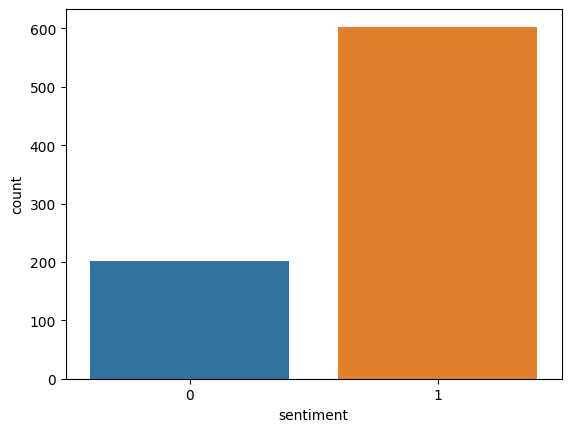

In [65]:
sns.countplot(x=train.sentiment
)  # make sure balaned data?

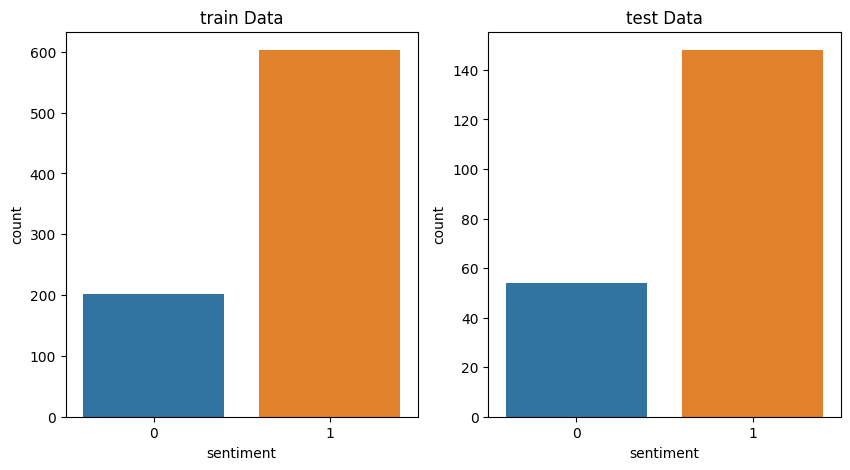

In [93]:
# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot count plot of original data on first subplot
sns.countplot(x=train.sentiment, ax=axs[0])
axs[0].set_title('train Data')


# Plot count plot of subsetted data on second subplot
sns.countplot(x=test.sentiment, ax=axs[1])
axs[1].set_title('test Data')

# Show plot
plt.show()

In [66]:
# converting a collection of text documents to a matrix of token counts. It essentially converts
# a collection of text documents into a sparse matrix, 
# where each row corresponds to a document and each column corresponds to a token in the corpus.

from sklearn.feature_extraction.text import CountVectorizer

print('Fitting data...')
count_vect = CountVectorizer()
count_vect.fit(train.txt) ; print('fit complete !')

print('tranforming training set...')
train_texts_vec = count_vect.transform(train.txt)

print('tranforming test set...')
test_texts_vec = count_vect.transform(test.txt)

Fitting data...
fit complete !
tranforming training set...
tranforming test set...


In [67]:
## Train a model

In [68]:
from sklearn.naive_bayes import MultinomialNB
train_labels = train.sentiment
test_labels = test.sentiment
nb = MultinomialNB()
nb.fit(train_texts_vec, train_labels)

MultinomialNB()

In [69]:
y_pred = nb.predict(test_texts_vec)

In [70]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(test_labels, y_pred))

Accuracy: 0.8811881188118812


## Unsupervised Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) Lexicon is a lexicon or a dictionary that contains a list of words with their associated sentiment scores. These sentiment scores indicate the degree of positivity, negativity, or neutrality of each word.

VADER Lexicon is specifically designed for sentiment analysis of social media texts like tweets, Facebook posts, and online reviews. It is a rule-based system that uses a combination of lexical and grammatical features to determine the sentiment of a text.

In [71]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # download necessary data for sentiment analysis

# 
df = df_copy

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [72]:
# Instantiate sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [73]:
# Define function to apply sentiment analysis to text
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [75]:
# Apply sentiment analysis to DataFrame and create new column with results
df['sentiment_pred'] = df['txt'].apply(get_sentiment)

In [76]:
df

,Unnamed: 0,txt,sentiment,num_of_words,sentiment_pred
0,84,voices from the farm: i have a copy of this bo...,1,27,0.6369
1,99,"caution!: these tracks are not the ""original"" ...",0,22,0.0000
2,100,textbook: book shipped quickly and was in exce...,1,16,0.7650
3,243,it was great!!!: i like it. it was very cool t...,1,21,0.7157
4,269,dockers do the job.: this product was just wha...,1,25,0.1761
...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,0.1045
1003,41045,i like movies: as someone who likes all kinds ...,1,24,0.8625
1004,41149,sick and twisted is good...: this book is sick...,1,25,-0.4404
1005,41156,difficult for a lay person: i found this book ...,0,24,0.5647


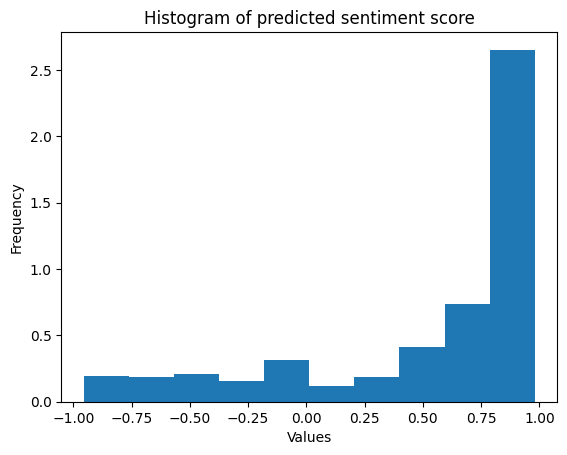

In [81]:
# Plot histogram of numeric column
import matplotlib.pyplot as plt

plt.hist(df['sentiment_pred'], bins=10,density = True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of ' + "predicted sentiment score")
plt.show()

In [ ]:
# do the same after applying a threshold on score: 0/1

In [82]:

# Set threshold value
threshold = 0


In [85]:

# Create new column with boolean values indicating whether values exceed threshold
df.loc[:, 'sentiment_score'] = df['sentiment_pred'] > threshold

In [86]:
df

,Unnamed: 0,txt,sentiment,num_of_words,sentiment_pred,sentiment_score
0,84,voices from the farm: i have a copy of this bo...,1,27,0.6369,True
1,99,"caution!: these tracks are not the ""original"" ...",0,22,0.0000,False
2,100,textbook: book shipped quickly and was in exce...,1,16,0.7650,True
3,243,it was great!!!: i like it. it was very cool t...,1,21,0.7157,True
4,269,dockers do the job.: this product was just wha...,1,25,0.1761,True
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,0.1045,True
1003,41045,i like movies: as someone who likes all kinds ...,1,24,0.8625,True
1004,41149,sick and twisted is good...: this book is sick...,1,25,-0.4404,False
1005,41156,difficult for a lay person: i found this book ...,0,24,0.5647,True


### WRITEING IN FUNCTIONS

# unsupervised sentiment analysis:

## First function using VADER

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # download necessary data for sentiment analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Instantiate sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Define function to apply sentiment analysis to text
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [ ]:
# Apply sentiment analysis to DataFrame and create new column with results
df['sentiment_pred'] = df['txt'].apply(get_sentiment)

required imports:


In [27]:
# required imports
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # download necessary data for sentiment analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

note sure how to squeeze these into a function.. or is it ok like this?


In [28]:
# Instantiate sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [26]:
# Define function to apply sentiment analysis to text
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [30]:
# Apply sentiment analysis to DataFrame and create new column with results
df['sentiment_pred'] = df['txt'].apply(get_sentiment)  # add a colum to the df

In [22]:
# Apply sentiment analysis to a single document
def get_sentiment(text):
  return get_sentiment(text) # 0.5675 for example

AttributeError: ignored

In [29]:
get_sentiment(df['txt'][0])

0.6369

## function using hugging face
https://huggingface.co/blog/sentiment-analysis-python

In [ ]:
from transformers import pipeline


In [16]:
sentiment_pipeline = pipeline("sentiment-analysis")
data = df['txt'][0]
sentiment_pipeline(data)['score']

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.999708354473114}]

In [32]:
sentiment_pipeline(data)[0]['label']

'POSITIVE'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00


required imports:

In [ ]:
pip install -q transformers
from transformers import pipeline

the function:

In [ ]:
## sentiment analysis on a single document:
def hugging_sentiment(text):
  sentiment_pipeline = pipeline("sentiment-analysis")
  # if we want to insert a corpus and not a single text:
  #  chance "text" with "data" where: data = df['txt'].tolist()
  return sentiment_pipeline(text)  # [{'label': 'POSITIVE', 'score': 0.999708354473114}]

In [ ]:
## sentiment analysis on a single document - return only sentiment score:
def hugging_sentiment(text):
  sentiment_pipeline = pipeline("sentiment-analysis")
  # if we want to insert a corpus and not a single text:
  #  chance "text" with "data" where: data = df['txt'].tolist()
  score = sentiment_pipeline(text)[0]['score']
  if sentiment_pipeline(text)[0]['label'] =='NEGATIVE'
  score = score*(-1)
  return score  #  0.999708354473114

## Supervised Function

In [ ]:
# define the inputs to the function
texts = df.txt
labels = df.labels

In [31]:
# required imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
def sentiment_test(df): # df should include 'txt' and 'labels' columns [df.txt , sd.labels]
  # split to train test
  train, test = train_test_split(df, test_size=0.2)  # split row's wise
  # define a model
  nb = MultinomialNB()
  # train a model
  nb.fit(train.txt, train.labels)
  # predict
  y_pred = nb.predict(test.txt)
  # return score
  print('Accuracy:', accuracy_score(test.labels, y_pred))
  return accuracy_score(test.labels, y_pred)

In [ ]:
train_labels = train.sentiment
test_labels = test.sentiment


MultinomialNB()

In [ ]:
y_pred = nb.predict(test_texts_vec)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(test_labels, y_pred))

Accuracy: 0.8811881188118812
